# Binary Classification with a Deep Neural Network

Until now we have seen the binary logistic regression model which is a linear model and how it corresponds to ta neural network with no hidden layer. 
The power of deep learning comes from the hidden layers which allow the model to learn more complex patterns.

A binary classification neural network with a hidden layer is shown below:

```mermaid
graph LR
    A1["$$x_1$$"] -->|"$$w_{11}$$"| B1["$$\sigma(z_1)$$"]
    A1 -->|"$$w_{12}$$"| B2["$$\sigma(z_2)$$"]
    A1 -->|"$$w_{13}$$"| B3["$$\sigma(z_3)$$"]
    A2["$$x_2$$"] -->|"$$w_{21}$$"| B1
    A2 -->|"$$w_{22}$$"| B2
    A2 -->|"$$w_{23}$$"| B3
    B1 -->|"$$w^{h}_{1}$$"| C["$$\sigma(o)$$"]
    B2 -->|"$$w^{h}_{2}$$"| C
    B3 -->|"$$w^{h}_{3}$$"| C
```



Before we turn to the mathematical formulation of the model, let's explore its capabilities.

The mathematical representation of the model is:

$$
\begin{align*}
h_1 &= w_{11}x_1 + w_{21}x_2 + b^{h}_1 \\
h_2 &= w_{12}x_1 + w_{22}x_2 + b^{h}_2 \\
h_3 &= w_{13}x_1 + w_{23}x_2 + b^{h}_3 \\
\theta &= w^{h}_{1}ReLU(h_1) + w^{h}_{2}ReLU(h_2) + w^{h}_{3}ReLU(h_3) + b^{o}_{1} \\
\hat{y} &= \sigma(\theta)
\end{align*}
$$

where $\sigma$ is the sigmoid function and serves as the activation function for the hidden layer and the output layer. The ReLU function is the activation function for the hidden layer and is defined as:

$$
\begin{align*}
ReLU(x) = \max(0, x)
\end{align*}
$$


The usual loss function for binary classification is the binary cross-entropy loss that we have already seen in the binary logistic regression model. For a single observation (sample), the loss function is:

$$
\begin{align*}
L(y, \hat{y}) &= -y\log(\hat{y}) - (1-y)\log(1-\hat{y})
\end{align*}
$$

For a single observation, the model is:

$$
\begin{align*}
z &= W^Tx + b \\
h &= ReLU(z) \\
s &= W_{h}^T h + b_{h} \\
\hat{y} &= \sigma(s)
\end{align*}
$$

Let's look at the dimensions of the matrices and vectors:

- $x$ is a vector of size $D_p$ (number of features)
- $W$ is a matrix of size $D_p \times D_h$ where $D_h$ is the number of hidden units
- $b$ is a vector of size $D_h$
- $z$ is a vector of size $D_h$
- $h$ is a vector of size $D_h$
- $W_h$ is a vector of size $D_h$
- $b_h$ is a scalar
- $s$ is a scalar
- $\hat{y}$ is a scalar


It is useful to formulate the model for all observations (or for a batch of observations).

The matrices and vectors are:

- $X$ is a matrix of size $D_p \times N$ where $N$ is the number of observations
- $W$ is a matrix of size $D_p \times D_h$
- $b$ is a vector of size $D_h$
- $Z$ is a matrix of size $D_h \times N$ (one column per observation)
- $H$ is a matrix of size $D_h \times N$
- $W_h$ is a vector of size $D_h$
- $b_h$ is a scalar
- $S$ is a vector of size $N$
- $\hat{Y}$ is a vector of size $N$
- $Y$ is a vector of size $N$

## Activation Functions

In this example we used the ReLU activation function for the hidden layer. The ReLU function is defined as:

$$
\begin{align*}
ReLU(x) = \max(0, x)
\end{align*}
$$

Other common activation functions are the sigmoid and the tanh functions. We already know the sigmoid function, it is defined as:

$$
\begin{align*}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{align*}
$$

The tanh function is defined as:

$$
\begin{align*}
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
\end{align*}
$$

The tanh function is similar to the sigmoid function but it is zero-centered and has a higher output range.

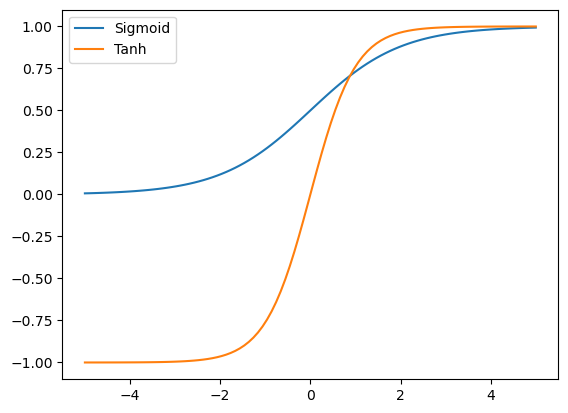

In [10]:
# Plot the sigmoid and the tanh functions

x = np.linspace(-5, 5, 100)
plt.figure()
plt.plot(x, 1 / (1 + np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='Tanh')
plt.legend()
plt.show()

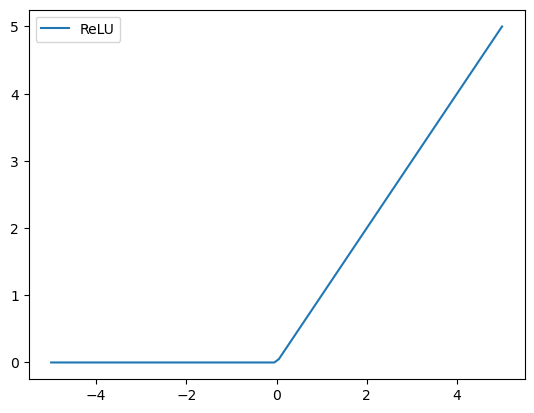

In [11]:
# Plot the ReLU function

plt.figure()
plt.plot(x, np.maximum(0, x), label='ReLU')
plt.legend()
plt.show()

## Forward Pass (Prediction)

For a network with a single hidden layer with $D$ hidden units and ReLU activation function, the forward pass is:

$$
\begin{align*}
z = W^Tx + b \\
h = ReLU(z) \\
\theta = W_{h}^T h + b_{h} \\
\hat{y} = \sigma(\theta)
\end{align*}
$$

Let's see a small example with 2 features and 3 hidden units.

In [23]:
import numpy as np

x = np.array([1, -1])
W = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
b = np.array([0.1, 0.2, 0.3])

print("Input: ", x)
print("Weights: ", W)
print("Bias: ", b)

z = W.T @ x + b

print("Hidden layer: ", z)

theta = np.tanh(z)

Wh = np.array([0.1, 0.2, 0.3])
bh = np.array([0.1])

print("Hidden layer weights: ", Wh)
print("Hidden layer bias: ", bh)

out = Wh.dot(theta) + bh

print("Output: ", out)

y_hat = 1 / (1 + np.exp(-out))

print("Prediction: ", y_hat)

Input:  [ 1 -1]
Weights:  [[0.1 0.2 0.3]
 [0.4 0.5 0.6]]
Bias:  [0.1 0.2 0.3]
Hidden layer:  [-0.2 -0.1  0. ]
Hidden layer weights:  [0.1 0.2 0.3]
Hidden layer bias:  [0.1]
Output:  [0.06032887]
Prediction:  [0.51507764]


## Backward Pass (Gradient Descent)

Different from the binary logistic regression model, here we have two sets of weights and biases to update.
Ignoring the biases for now, we derive the gradients for the weights of the hidden layer and the output layer.

The loss function is the binary cross-entropy loss:

$$
\begin{align*}
J(y, \hat{y}) &= -y\log(\hat{y}) - (1-y)\log(1-\hat{y})
\end{align*}
$$

Notice that the last part of the network is actually a logistic regression model that uses the hidden layer output as input instead of the
original features (as in the binary logistic regression model). Therefore, the gradient of the loss function with respect to the weights of the hidden layer is the same as the gradient of the loss function with respect to the weights of the logistic regression model (only the input is $h$ instead of $x$).

$$
\begin{align*}
\frac{\partial J}{\partial W_h} &= 
\frac{\partial J}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \theta} \frac{\partial \theta}{\partial W_h} \\
&= - (\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}) \hat{y}(1-\hat{y}) h \\
&= - (y(1-\hat{y}) - \hat{y}(1-y)) h \\
&= - (y - \hat{y}) h \\
&= (\hat{y} - y) h
\end{align*}
$$

The new gradient in this model is for the weights of the hidden layer. Again, we obtain it using the chain rule.

$$
\begin{align*}
\frac{\partial J}{\partial W} &=
\frac{\partial J}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \theta} \frac{\partial \theta}{\partial ReLU(h)} \frac{\partial ReLU(h)}{\partial h} \frac{\partial h}{\partial W}
\end{align*}
$$

We have already derived the first two terms. The third term is the derivative of the output layer value ($\theta$) with respect to activation of the hidden layer ($ReLU(h)$).

Remember that $\theta = W_{h}^T ReLU(h) + b^{o}$ and the ReLU function is applied element-wise. Therefore, the derivative of $\theta$ with respect to $ReLU(h)$ is $W_h$.

We obtain it by @thm-matrix-vector-by-vector:


The derivative of the ReLU function is:

$$
\begin{align*}
\frac{\partial ReLU(x)}{\partial x} =
\begin{cases}
1, & \text{if } x > 0 \\
0, & \text{if } x \leq 0
\end{cases}
\end{align*}
$$

For short we can use the sign function:

$$
\begin{align*}
\frac{\partial ReLU(x)}{\partial x} = \text{sign}(x)
\end{align*}
$$

The derivative of a vector with respect to itself is the identity matrix. Therefore, the derivative of the ReLU function with respect to the hidden layer activation is a diagonal matrix with the sign of the hidden layer activation.

$$
\begin{align*}
\frac{\partial ReLU(h)}{\partial h} = \text{diag}(\text{sign}(h))
\end{align*}
$$

We can write the product of the derivatives up to the last term:

$$
\begin{align*}
\frac{\partial J}{\partial h} &=
(\hat{y} - y) W_h \odot \text{sign}(h)
\end{align*}
$$

Note that this derivative is a vector of size $H$.

For the last derivative we have the same result as in the multi-class logistic regression model, so the final gradient is the outer product of the last derivative and the input.

$$
\begin{align*}
\frac{\partial J}{\partial W} &=
(\hat{y} - y) W_h \odot \text{sign}(h) \cdot x^T
\end{align*}
$$



:::{#exr-derivative-tanh}
## Exercise: Derivative of the tanh function

Derive the derivative of the tanh function with respect to its input.

$$
\begin{align*}
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
\end{align*}
$$

We simply need to apply the quotient rule to the function. The derivative of the numerator is:

$$
\begin{align*}
\frac{d}{dx} (e^{x} - e^{-x}) = e^{x} + e^{-x}
\end{align*}
$$

The derivative of the denominator is:

$$
\begin{align*}
\frac{d}{dx} (e^{x} + e^{-x}) = e^{x} - e^{-x}
\end{align*}
$$

Therefore, the derivative of the tanh function is:

$$
\begin{align*}
\frac{d}{dx} \tanh(x) = \frac{(e^{x} - e^{-x})(e^{x} + e^{-x}) - (e^{x} + e^{-x})(e^{x} - e^{-x})}{(e^{x} + e^{-x})^2} = 1 - \tanh^2(x)
\end{align*}
$$

:::

:::{#exr-tanh-activation}
## Exercise: tanh activation function

Take the example of the binary classification network with a hidden layer and replace the ReLU activation function with the tanh activation function. Derive the forward pass and the backward pass for the model.
:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The network remains the same, except that we replace the ReLU activation function with the tanh activation function. The forward pass is:

$$
\begin{align*}
z = W^Tx + b \\
h = \tanh(z) \\
\theta = W_{o}^T h + b_{h} \\
\hat{y} = \sigma(\theta)
\end{align*}
$$

The backward pass is:

$$
\begin{align*}
\frac{\partial J}{\partial W_o} 
&= (\hat{y} - y) h \\
\frac{\partial J}{\partial W}
&= (\hat{y} - y) W_o \odot (1 - h^2) x^T
\end{align*}
$$
:::

